Aplicación de PCA (Análisis de Componentes Principales)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Cargar y Preprocesar el Dataset

In [2]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')
#'/content/drive/My Drive/proyectoIA/dataset_modificado.xlsx'

# Cargar el dataset preprocesado
df = pd.read_excel('/content/drive/My Drive/proyectoIA/dataset_modificado.xlsx')

# Separar características (X) y la variable objetivo (y)
X = df[['Producion', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']]
y = df['Consumo']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Mounted at /content/drive


Aplicar PCA y Evaluar con Diferentes Cantidades de Componentes

In [4]:
def evaluar_pca(n_componentes):
    pca = PCA(n_components=n_componentes)
    X_pca = pca.fit_transform(X_scaled)

    # División 80/20
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Inicializar el modelo Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Entrenar el modelo
    rf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = rf.predict(X_test)

    # Evaluar el rendimiento
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Componentes: {n_componentes}, MSE: {mse}, R^2: {r2}")

# Evaluar con diferentes cantidades de componentes
for n_componentes in [8, 7, 6, 5, 4, 3]:
    evaluar_pca(n_componentes)


Componentes: 8, MSE: 0.18249359809160853, R^2: 0.8205410183293824
Componentes: 7, MSE: 0.17847773928044006, R^2: 0.8244900989564381
Componentes: 6, MSE: 0.20047487738147016, R^2: 0.8028587428729377
Componentes: 5, MSE: 0.21714565495239285, R^2: 0.7864651773023067
Componentes: 4, MSE: 0.25373332292271905, R^2: 0.7504859117043902
Componentes: 3, MSE: 0.31728047267999937, R^2: 0.6879954632570584


**Proceso de Aprendizaje No Supervisado**

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Aplicar K-Means

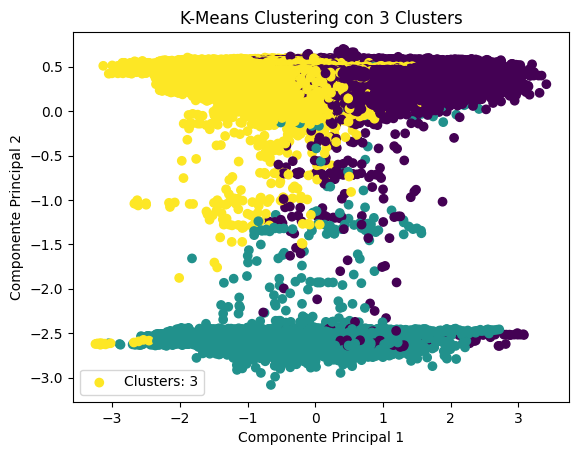

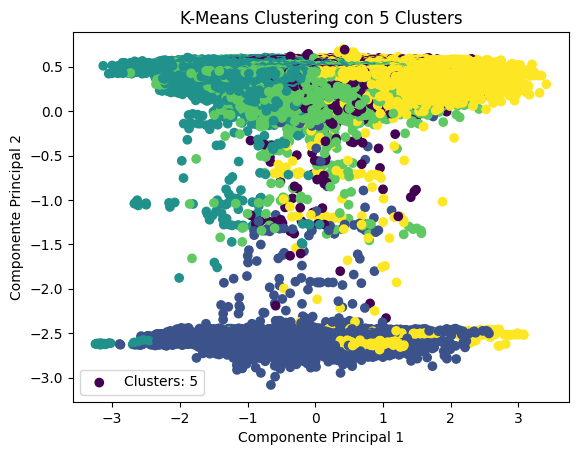

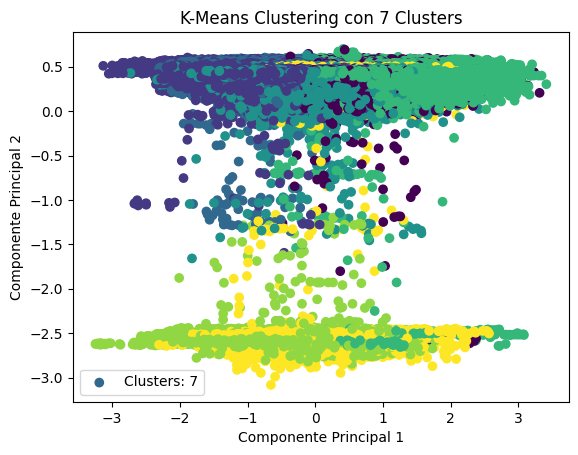

In [6]:
# Aplicar K-Means con diferentes números de clusters
def aplicar_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Agregar resultados de clustering al dataframe
    df[f'Cluster_{n_clusters}'] = clusters

    # Visualización de los clusters en los primeros dos componentes principales
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', label=f'Clusters: {n_clusters}')
    plt.title(f'K-Means Clustering con {n_clusters} Clusters')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()

# Aplicar K-Means con 3, 5 y 7 clusters
for n_clusters in [3, 5, 7]:
    aplicar_kmeans(n_clusters)
